In [1]:
import tensorflow as tf
import pandas as pd


from utils.helper import *
from models.MLP import MultiLayerPerceptron

df = read_dataset("ArrowHead")

model = MultiLayerPerceptron()

history = model.fit(df[0],df[1],20)

2024-02-13 14:32:20.780094: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-13 14:32:21.554142: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Epoch 1/100


2024-02-13 14:32:22.600976: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-13 14:32:22.632232: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-13 14:32:22.632384: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

ValueError: in user code:

    File "/home/elnur/Desktop/MLP_MultiLayerPerceptron/env/lib/python3.8/site-packages/keras/src/engine/training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "/home/elnur/Desktop/MLP_MultiLayerPerceptron/env/lib/python3.8/site-packages/keras/src/engine/training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/elnur/Desktop/MLP_MultiLayerPerceptron/env/lib/python3.8/site-packages/keras/src/engine/training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "/home/elnur/Desktop/MLP_MultiLayerPerceptron/env/lib/python3.8/site-packages/keras/src/engine/training.py", line 1081, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/home/elnur/Desktop/MLP_MultiLayerPerceptron/env/lib/python3.8/site-packages/keras/src/engine/training.py", line 1139, in compute_loss
        return self.compiled_loss(
    File "/home/elnur/Desktop/MLP_MultiLayerPerceptron/env/lib/python3.8/site-packages/keras/src/engine/compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/home/elnur/Desktop/MLP_MultiLayerPerceptron/env/lib/python3.8/site-packages/keras/src/losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "/home/elnur/Desktop/MLP_MultiLayerPerceptron/env/lib/python3.8/site-packages/keras/src/losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/home/elnur/Desktop/MLP_MultiLayerPerceptron/env/lib/python3.8/site-packages/keras/src/losses.py", line 2122, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/home/elnur/Desktop/MLP_MultiLayerPerceptron/env/lib/python3.8/site-packages/keras/src/backend.py", line 5560, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 36) are incompatible


In [5]:
print(history)

None


In [5]:
results=[]

In [13]:
import tensorflow as tf
import pandas as pd

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

import gc


from utils.helper import *
from utils.constants import *
from models.MLP import MultiLayerPerceptron



results=[]

try:
    for dataset in  UNIVARIATE_DATASET_NAMES_2018:
        with tf.device("/device:GPU:0"):
            # Load data
            df = read_dataset(dataset)

            # apply one-hot encoder
            y_train=to_categorical(df[1])
            y_test=to_categorical(df[3])

            # Compile the model
            model = MultiLayerPerceptron(input_size=df[0].shape[1], num_labels=y_train.shape[1])
            model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['accuracy'])

            # Train the model
            history = model.fit(df[0], y_train, batch_size=16, epochs=1000, validation_split=0.2)

            # Evaluate the model
            loss, accuracy = model.evaluate(df[2], y_test)

            results.append([dataset, loss, accuracy])
        clear_gpu_memory()
        gc.collect()
            
    pd.DataFrame(results, columns=["Dataset","Test loss", "Test accuracy"]).to_csv("result.csv", index=False)

except Exception as e:
    print("An error occurred:", e)

Epoch 1/1000
2/2 [==============================] - 1s 141ms/step - loss: 1.1450 - accuracy: 0.3571 - val_loss: 0.8505 - val_accuracy: 0.6250
Epoch 2/1000
2/2 [==============================] - 0s 27ms/step - loss: 0.8221 - accuracy: 0.6071 - val_loss: 0.9090 - val_accuracy: 0.6250
Epoch 3/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.7168 - accuracy: 0.6429 - val_loss: 0.7513 - val_accuracy: 0.6250
Epoch 4/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.5904 - accuracy: 0.7143 - val_loss: 0.6757 - val_accuracy: 0.5000
Epoch 5/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.4561 - accuracy: 0.8571 - val_loss: 0.5930 - val_accuracy: 0.6250
Epoch 6/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.4628 - accuracy: 0.8571 - val_loss: 0.6596 - val_accuracy: 0.6250
Epoch 7/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.4379 - accuracy: 0.8214 - val_loss: 0.5627 - val_accuracy: 0.7500
Epoch 8/1000

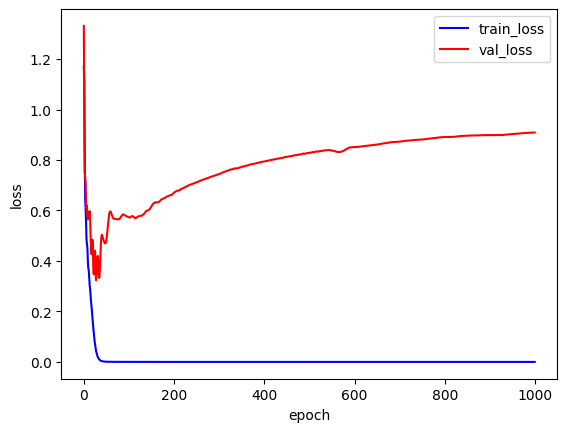

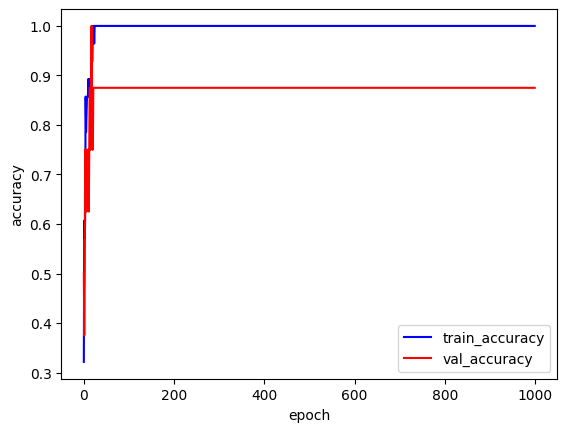

In [9]:

plot_loss(history,"loss")
plot_loss(history,"accuracy")

In [31]:
results = pd.read_csv("result.csv")
results

,Dataset,Test loss,Test accuracy
0,ArrowHead,2.032612,0.760000
1,Wine,0.744140,0.500000
2,FreezerSmallTrain,5.285032,0.661404
3,OliveOil,0.793394,0.733333
4,Car,3.124298,0.866667
5,BeetleFly,1.272229,0.700000
6,Yoga,4.080969,0.805000
7,InlineSkate,13.112132,0.330909
8,FaceAll,21.472450,0.634911
9,EOGVerticalSignal,26.592010,0.323204


In [15]:
results_uea=pd.read_csv("results-uea-avg-std.csv")
results_uea

,Unnamed: 0,MLP,FCN,ResNet,Encoder,MCNN,t-LeNet,MCDCNN,Time-CNN,TWIESN
0,50words,68.4(7.1),62.7(6.1),74.0(1.5),72.3(1.0),22.0(24.3),12.5(0.0),58.9(5.3),62.1(1.0),49.6(2.6)
1,Adiac,39.7(1.9),84.4(0.7),82.9(0.6),48.4(2.5),2.2(0.6),2.0(0.0),61.0(8.7),37.9(2.0),41.6(4.5)
2,ArrowHead,77.8(1.2),84.3(1.5),84.5(1.2),80.4(2.9),33.9(4.7),30.3(0.0),68.5(6.7),72.3(2.6),65.9(9.4)
3,Beef,72.0(2.8),69.7(4.0),75.3(4.2),64.3(5.0),20.0(0.0),20.0(0.0),56.3(7.8),76.3(1.1),53.7(14.9)
4,BeetleFly,87.0(2.6),86.0(9.7),85.0(2.4),74.5(7.6),50.0(0.0),50.0(0.0),58.0(9.2),89.0(3.2),73.0(7.9)
...,...,...,...,...,...,...,...,...,...,...
82,uWaveGestureLibrary_Z,69.7(0.2),72.6(0.5),75.0(0.4),71.1(0.5),18.0(18.4),12.1(0.0),65.0(1.8),64.2(0.9),56.5(2.0)
83,wafer,99.6(0.0),99.7(0.0),99.9(0.1),99.6(0.0),91.3(4.4),89.2(0.0),99.2(0.3),96.1(0.1),91.4(0.5)
84,yoga,85.5(0.4),83.9(0.7),87.0(0.9),82.0(0.6),53.6(0.0),53.6(0.0),76.2(3.9),78.1(0.7),60.7(1.9)
85,Average_Rank,4.611765,2.682353,1.994118,3.682353,8.017647,8.417647,5.376471,4.970588,5.247059


In [32]:
df = pd.read_csv("results-uea-avg-std.csv")


# remove std
def remove_parenthesis(value):
    return float(value.split("(")[0])

def convert_to_percent(value):
    return float("%.2f" % float(value*100))

df.iloc[:, 1:] = df.iloc[:, 1:].applymap(remove_parenthesis)
results["Test accuracy"]=results["Test accuracy"].apply(convert_to_percent)

df['Unnamed: 0'] = df['Unnamed: 0'].str.lower()
dataset_names = pd.Series(UNIVARIATE_DATASET_NAMES_2018, name="Unnamed: 0").str.lower()
df_copy = df.merge(dataset_names, on='Unnamed: 0', how='right')
df_copy.dropna(axis=0, inplace=True)

results['Unnamed: 0'] = results['Dataset'].str.lower()

# merge and remove unused columns
result = results.merge(df_copy[["Unnamed: 0","MLP"]],on="Unnamed: 0",how="right").drop("Unnamed: 0",axis=1)
result

/tmp/ipykernel_292675/2810729965.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.iloc[:, 1:] = df.iloc[:, 1:].applymap(remove_parenthesis)


,Dataset,Test loss,Test accuracy,MLP
0,ArrowHead,2.032612,76.00,77.8
1,Wine,0.744140,50.00,56.5
2,OliveOil,0.793394,73.33,66.7
3,Car,3.124298,86.67,76.7
4,BeetleFly,1.272229,70.00,87.0
5,Yoga,4.080969,80.50,85.5
6,InlineSkate,13.112132,33.09,33.7
7,FaceAll,21.472450,63.49,79.3
8,Ham,4.345583,70.48,69.1
9,MoteStrain,1.264398,86.50,85.8


FileNotFoundError: [Errno 2] No such file or directory: 'compare_results/MLP_runs_10.png'

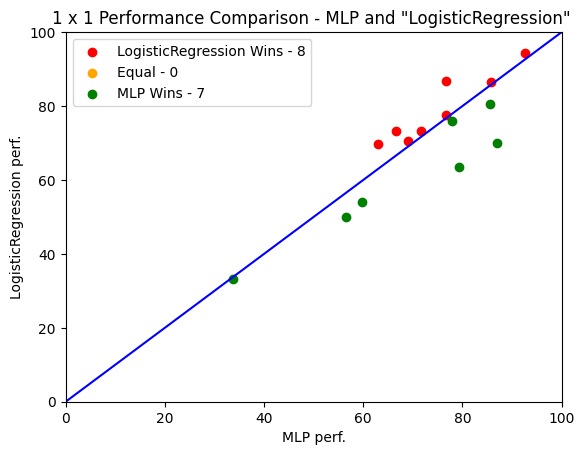

In [35]:
plot_1v1_perf(result,"MLP","Test accuracy")